# Dask

In [1]:
from dask.distributed import Client
client = Client()

In [2]:
client

<Client: 'tcp://127.0.0.1:42539' processes=4 threads=16, memory=31.19 GiB>

In [3]:
import numpy as np
import pandas as pd

## Dask Array

In [4]:
import dask.array as da

In [5]:
ones_np = np.ones(100)
ones_np

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
ones_da = da.ones(100, chunks=20)
ones_da

dask.array<ones_like, shape=(100,), dtype=float64, chunksize=(20,), chunktype=numpy.ndarray>

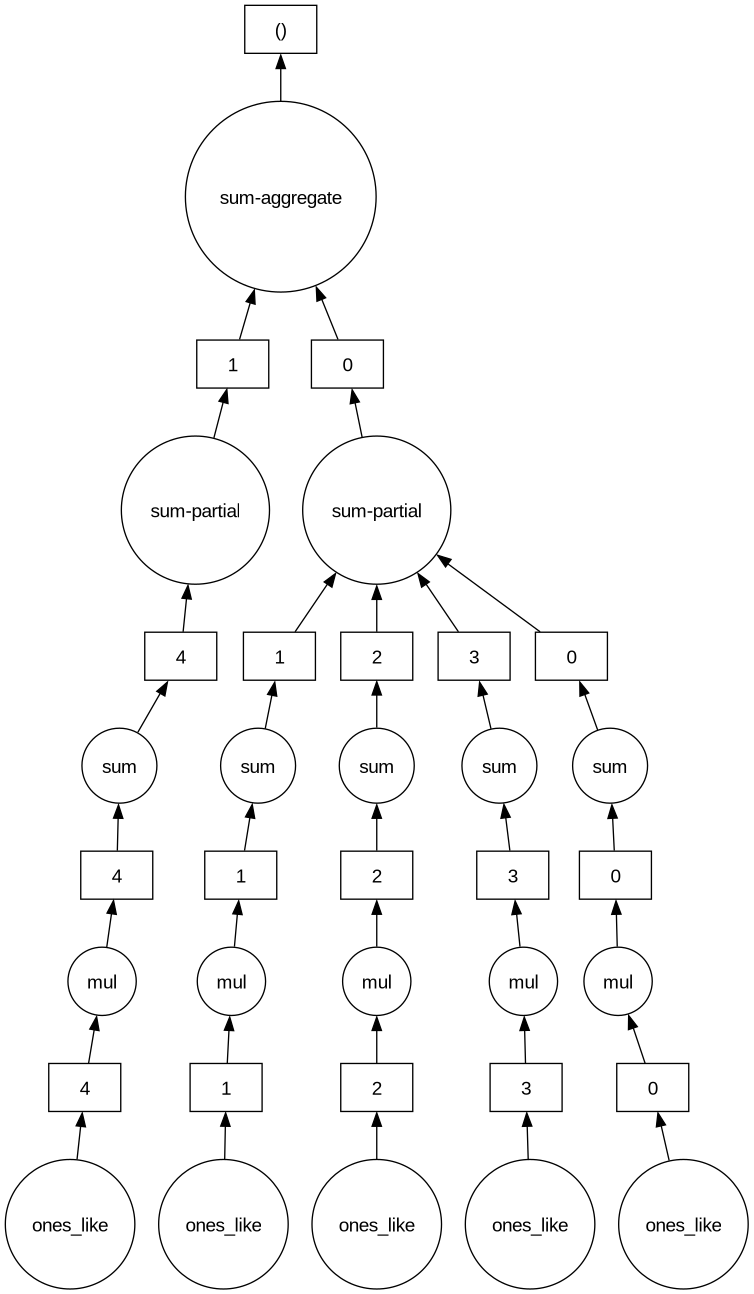

In [7]:
twos_da = ones_da * 3
sum_da = twos_da.sum()
sum_da.visualize()

In [8]:
sum_da

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [9]:
sum_da.compute()

300.0

## Dask DataFrame

In [10]:
import dask.dataframe as dd

In [11]:
url = 'http://bit.ly/kaggletrain'
pddf = pd.read_csv(url)
pddf

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [12]:
# Dividir y guardar datos
nfiles = 9
npddf = len(pddf)
npersplit = npddf // nfiles 
npersplit += 1 if npddf % nfiles > 0 else 0
for i in range(nfiles):
  ini_idx = i * npersplit
  fin_idx = ini_idx + npersplit 
  split_df = pddf[ini_idx:fin_idx] 
  with open(f"kaggletrain-{i}.csv","w") as out:
    out.write(split_df.to_csv())

In [13]:
# Leer datos
ddf = dd.read_csv('kaggletrain*.csv')
ddf

Dask DataFrame Structure:
              Unnamed: 0 PassengerId Survived Pclass    Name     Sex      Age  SibSp  Parch  Ticket     Fare   Cabin Embarked
npartitions=9                                                                                                                
                   int64       int64    int64  int64  string  string  float64  int64  int64  string  float64  string   string
                     ...         ...      ...    ...     ...     ...      ...    ...    ...     ...      ...     ...      ...
...                  ...         ...      ...    ...     ...     ...      ...    ...    ...     ...      ...     ...      ...
                     ...         ...      ...    ...     ...     ...      ...    ...    ...     ...      ...     ...      ...
                     ...         ...      ...    ...     ...     ...      ...    ...    ...     ...      ...     ...      ...
Dask Name: read_csv, 1 expression
Expr=ReadCSV(53d313c)

**Aun no se han cargado los datos**

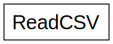

In [14]:
ddf.visualize()

In [15]:
ddf.compute()

Unnamed: 0  PassengerId  Survived  Pclass  \
0            0            1         0       3   
1            1            2         1       1   
2            2            3         1       3   
3            3            4         1       1   
4            4            5         0       3   
..         ...          ...       ...     ...   
94         886          887         0       2   
95         887          888         1       1   
96         888          889         0       3   
97         889          890         1       1   
98         890          891         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
94                              Montvila, Rev. Juozas    male  27.0      0   
95                       Graham, Miss. Margaret Edith  female  19.0      0   
96           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
97                              Behr, Mr. Karl Howell    male  26.0      0   
98                                Dooley, Mr. Patrick    male  32.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
..    ...               ...      ...   ...      ...  
94      0            211536  13.0000   NaN        S  
95      0            112053  30.0000   B42        S  
96      2        W./C. 6607  23.4500   NaN        S  
97      0            111369  30.0000  C148        C  
98      0            370376   7.7500   NaN        Q  

[891 rows x 13 columns]

In [16]:
mean_age = ddf.groupby("Sex").Age.mean()
mean_age

Dask Series Structure:
npartitions=1
    float64
        ...
Dask Name: getitem, 4 expressions
Expr=((ReadCSV(53d313c)[['Sex', 'Age']]).mean(observed=False, chunk_kwargs={'numeric_only': False}, aggregate_kwargs={'numeric_only': False}, _slice='Age'))['Age']

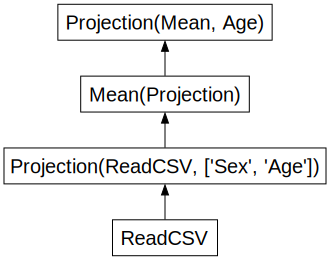

In [17]:
mean_age.visualize()

In [18]:
mean_age.compute()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

## Dask Bag

In [19]:
import dask.bag as db

In [20]:
b = db.from_sequence(np.arange(50), npartitions=5)
b

dask.bag<from_sequence, npartitions=5>

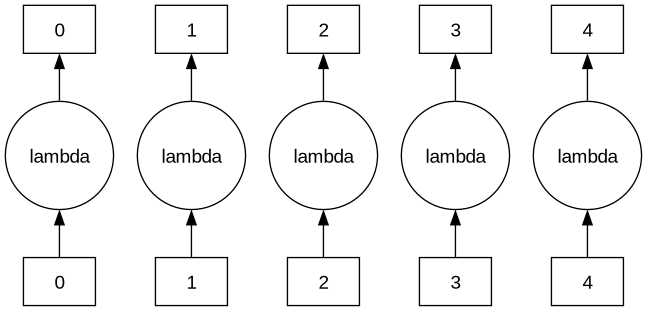

In [21]:
b1 = b.map(lambda x: np.exp(x))
b1.visualize()

In [22]:
b1.compute()

[1.0,
 2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766,
 403.4287934927351,
 1096.6331584284585,
 2980.9579870417283,
 8103.083927575384,
 22026.465794806718,
 59874.14171519782,
 162754.79141900392,
 442413.3920089205,
 1202604.2841647768,
 3269017.3724721107,
 8886110.520507872,
 24154952.7535753,
 65659969.13733051,
 178482300.96318725,
 485165195.4097903,
 1318815734.4832146,
 3584912846.131592,
 9744803446.248903,
 26489122129.84347,
 72004899337.38588,
 195729609428.83878,
 532048240601.79865,
 1446257064291.475,
 3931334297144.042,
 10686474581524.463,
 29048849665247.426,
 78962960182680.69,
 214643579785916.06,
 583461742527454.9,
 1586013452313430.8,
 4311231547115195.0,
 1.1719142372802612e+16,
 3.1855931757113756e+16,
 8.659340042399374e+16,
 2.3538526683702e+17,
 6.398434935300549e+17,
 1.739274941520501e+18,
 4.727839468229346e+18,
 1.2851600114359308e+19,
 3.4934271057485095e+19,
 9.496119420602448e+19,
 2.58131288619006

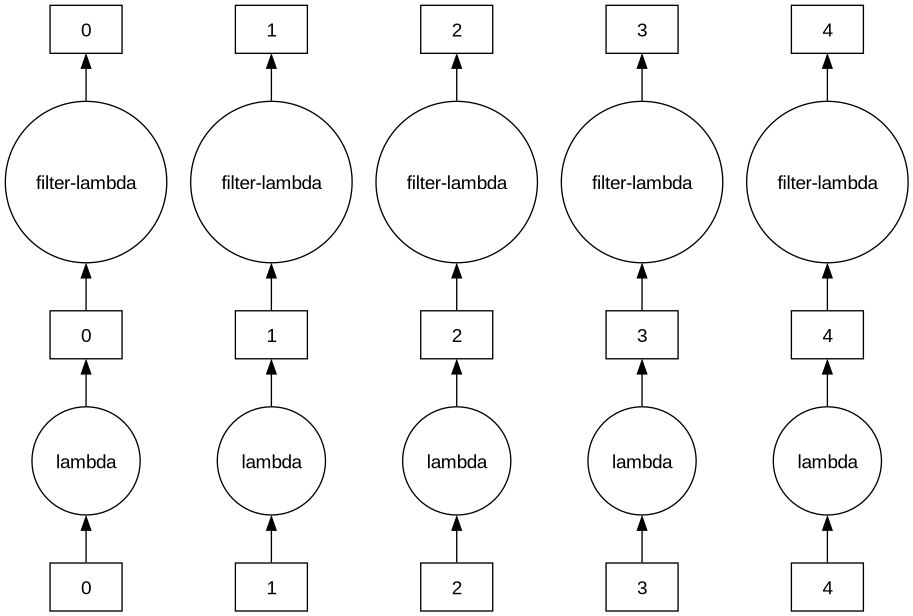

In [23]:
b2 = b.map(lambda x: x ** 2).filter(lambda x: x % 3 == 0)
b2.visualize()

In [24]:
b2

dask.bag<filter-lambda, npartitions=5>

In [25]:
b2.compute()

[0,
 9,
 36,
 81,
 144,
 225,
 324,
 441,
 576,
 729,
 900,
 1089,
 1296,
 1521,
 1764,
 2025,
 2304]

In [26]:
b2.take(3)

(0, 9, 36)

# Dask Array (en mayor detalle)

## map_blocks

In [27]:
q = da.arange(15, chunks=3)
q

dask.array<arange, shape=(15,), dtype=int64, chunksize=(3,), chunktype=numpy.ndarray>

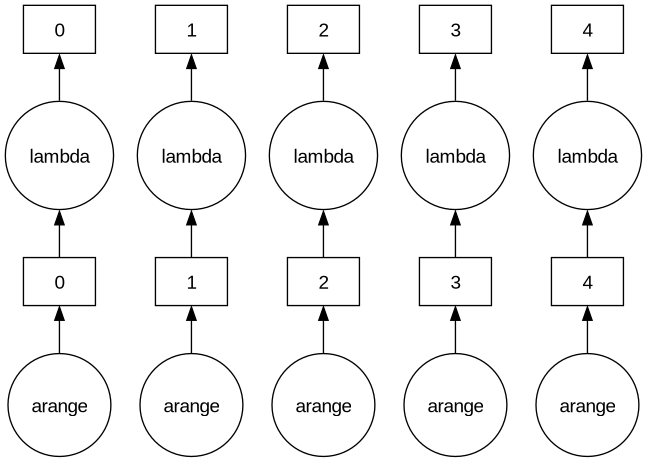

In [28]:
mp1 = q.map_blocks(lambda x: np.log(x))
mp1.visualize()

In [29]:
mp1.compute()

/tmp/ipykernel_14876/2755638579.py:1: RuntimeWarning: divide by zero encountered in log


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458,
       2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733])

In [30]:
w = da.from_array(np.arange(30).reshape((10,3)),chunks=5)
w

dask.array<array, shape=(10, 3), dtype=int64, chunksize=(5, 3), chunktype=numpy.ndarray>

In [31]:
mb2 = w.map_blocks(lambda x : x.sum(axis=-1), drop_axis=1)
mb2

dask.array<lambda, shape=(10,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [32]:
mb2.compute()

array([ 3, 12, 21, 30, 39, 48, 57, 66, 75, 84])

In [33]:
e = da.arange(1000, chunks=(100,))
r = da.arange(100, chunks=(10,))

In [34]:
def max_func(a, b):
  return np.array([a.max(), b.max()])

In [35]:
mb3 = da.map_blocks(max_func, e, r, chunks=(2,), dtype='i8')
mb3

dask.array<max_func, shape=(20,), dtype=int64, chunksize=(2,), chunktype=numpy.ndarray>

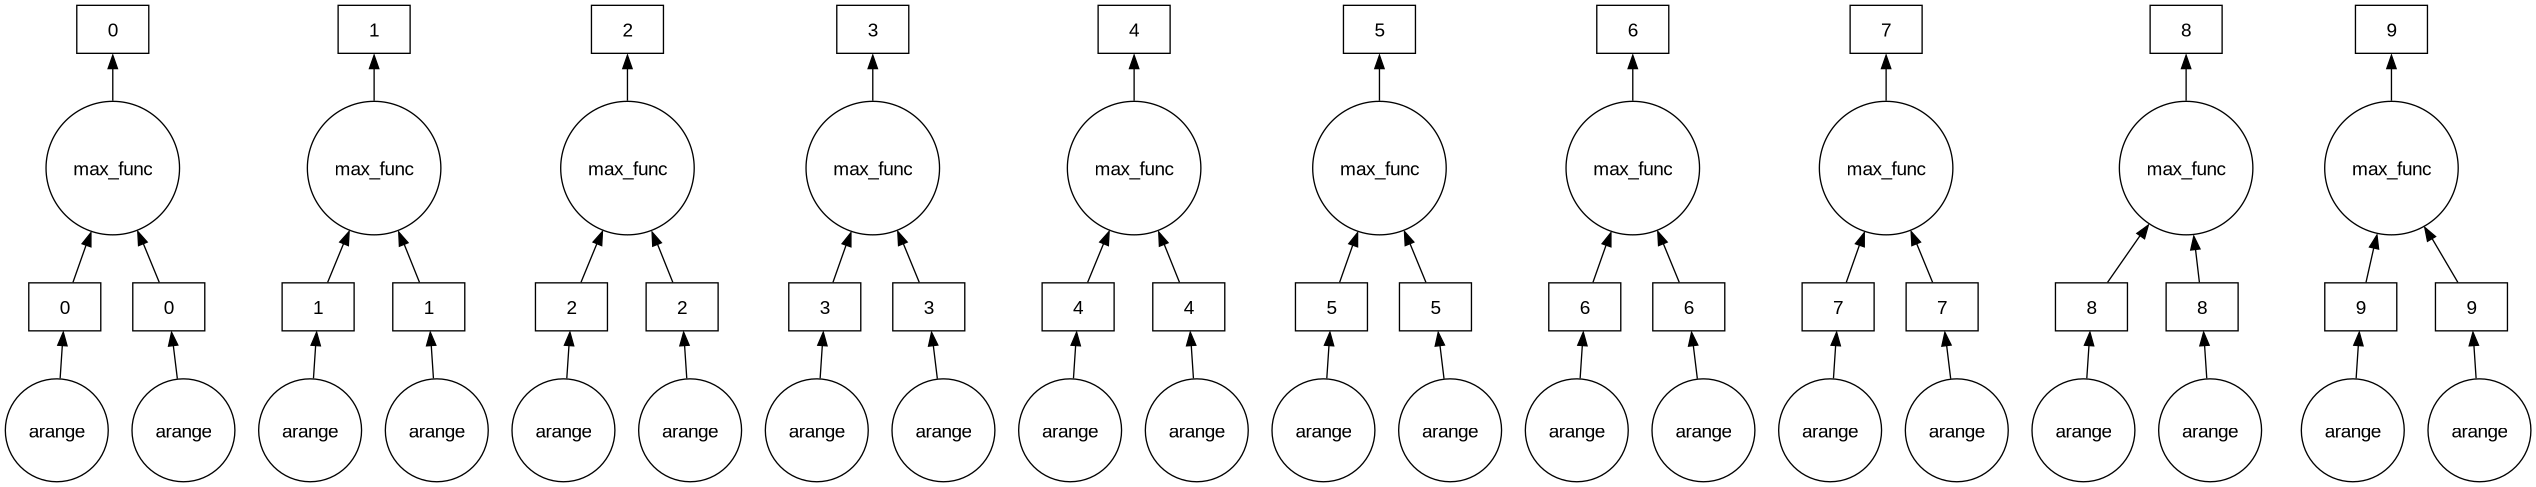

In [36]:
mb3.visualize()

In [37]:
mb3.compute()

array([ 99,   9, 199,  19, 299,  29, 399,  39, 499,  49, 599,  59, 699,
        69, 799,  79, 899,  89, 999,  99])

## blockwise

In [38]:
x = da.ones((20,2), chunks=5)
x

dask.array<ones_like, shape=(20, 2), dtype=float64, chunksize=(5, 2), chunktype=numpy.ndarray>

In [39]:
y = da.full((20, 2), 3)
y

dask.array<full_like, shape=(20, 2), dtype=int64, chunksize=(20, 2), chunktype=numpy.ndarray>

In [40]:
def dumb_func(x, y):
  return x * y - y / 2

In [41]:
bw1 = da.blockwise(
  dumb_func,
  ('i','j'),
  x,
  ('i','j'),
  y,
  ('i','j'),
  dtype = np.float32
)
bw1

dask.array<dumb_func, shape=(20, 2), dtype=float32, chunksize=(5, 2), chunktype=numpy.ndarray>

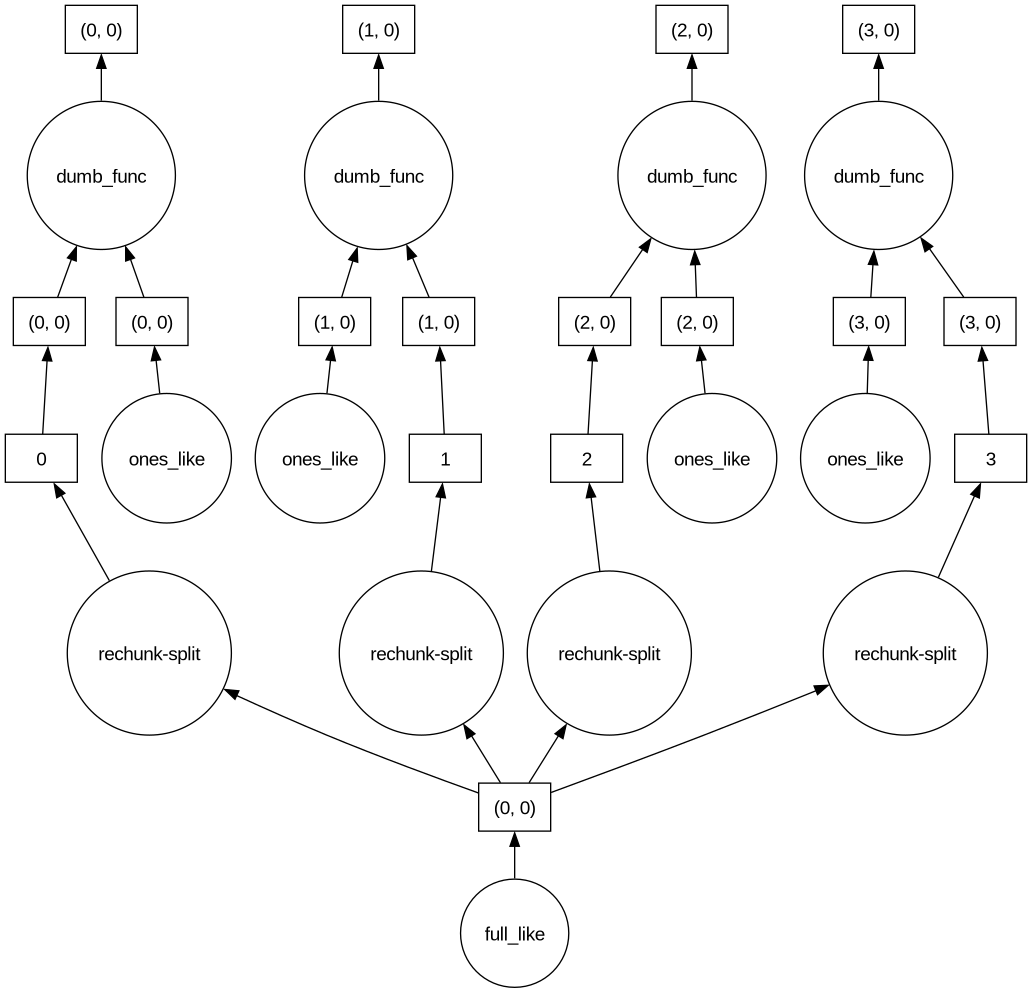

In [42]:
bw1.visualize()

In [43]:
bw1.compute()

array([[1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5]])

### Segundo *array* fragmentado

In [44]:
z = da.full((20,2), 3, chunks=5)
z

dask.array<full_like, shape=(20, 2), dtype=int64, chunksize=(5, 2), chunktype=numpy.ndarray>

In [45]:
bw2 = da.blockwise(
  dumb_func,
  ('i','j'),
  x,
  ('i','j'),
  z,
  ('i','j'),
  dtype = np.float32
)
bw2

dask.array<dumb_func, shape=(20, 2), dtype=float32, chunksize=(5, 2), chunktype=numpy.ndarray>

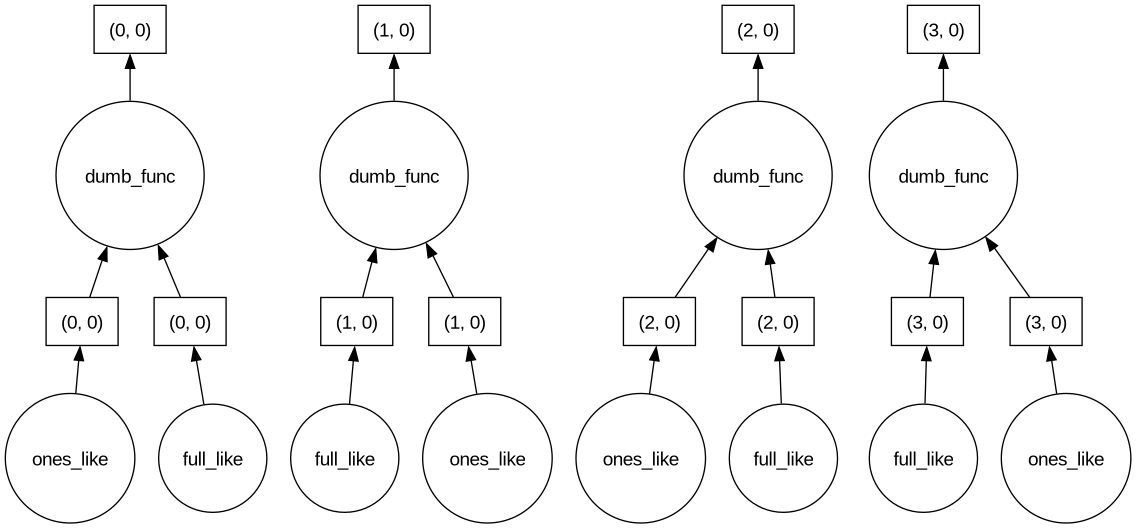

In [46]:
bw2.visualize()

In [47]:
bw2.compute()

array([[1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5]])

### Agregar dimension

In [48]:
def add_axis(x):
  return x[:, :, None] * np.ones((1,1,3))

In [49]:
bw3 = da.blockwise(
  add_axis,
  ('i','j','k'),
  x,
  ('i','j'),
  new_axes = {'k' : 3},
  dtype = x.dtype
)
bw3

dask.array<add_axis, shape=(20, 2, 3), dtype=float64, chunksize=(5, 2, 3), chunktype=numpy.ndarray>

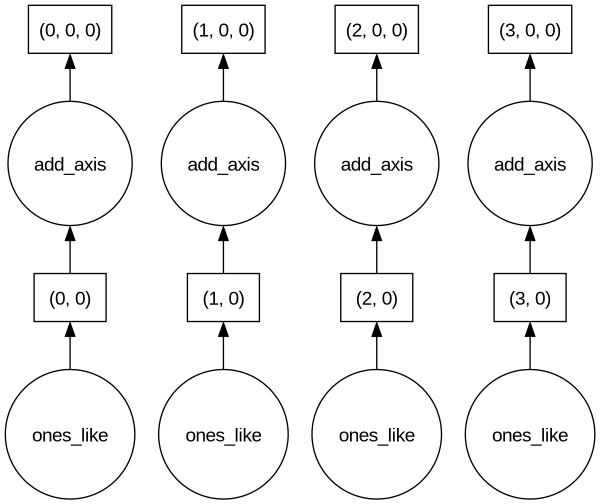

In [50]:
bw3.visualize()

In [51]:
bw3.compute()

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

### Reducir dimension

In [52]:
def reduce_1dim(x):
  return x[0].sum(axis=-1)

In [53]:
bw4 = da.blockwise(
  reduce_1dim,
  ('i'),
  x,
  ('i', 'j'),
  dtype=x.dtype
)
bw4

dask.array<reduce_1dim, shape=(20,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

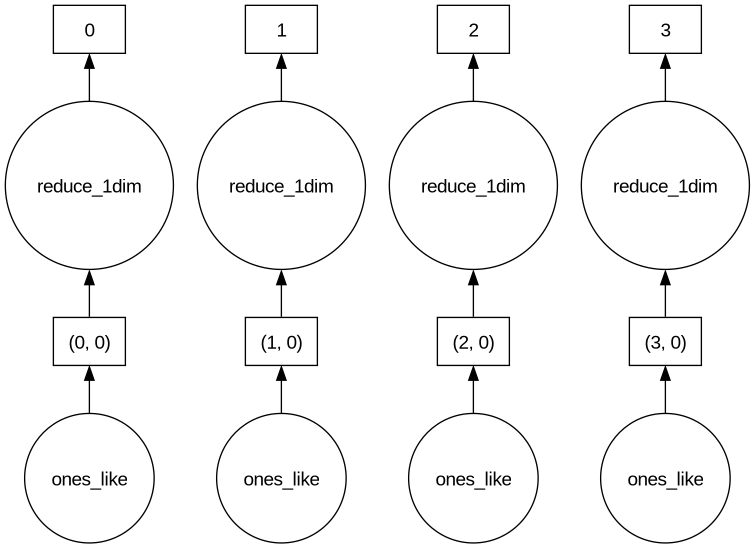

In [54]:
bw4.visualize()

In [55]:
bw4.compute()

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

### Salida con *n* menos dimensiones que la entrada

In [56]:
a = da.from_array(np.arange(1280).reshape((20, 8, 4, 2)), chunks=(5,4,2,1))
a

dask.array<array, shape=(20, 8, 4, 2), dtype=int64, chunksize=(5, 4, 2, 1), chunktype=numpy.ndarray>

In [57]:
def reduce_fun_1(x):
  y = x[0][0]
  return y.sum(axis=(-1,-2))

In [58]:
bw5 = da.blockwise(
  reduce_fun_1,
  ('i', 'j'),
  a,
  ('i', 'j', 'k', 'l'),
  dtype = a.dtype
)

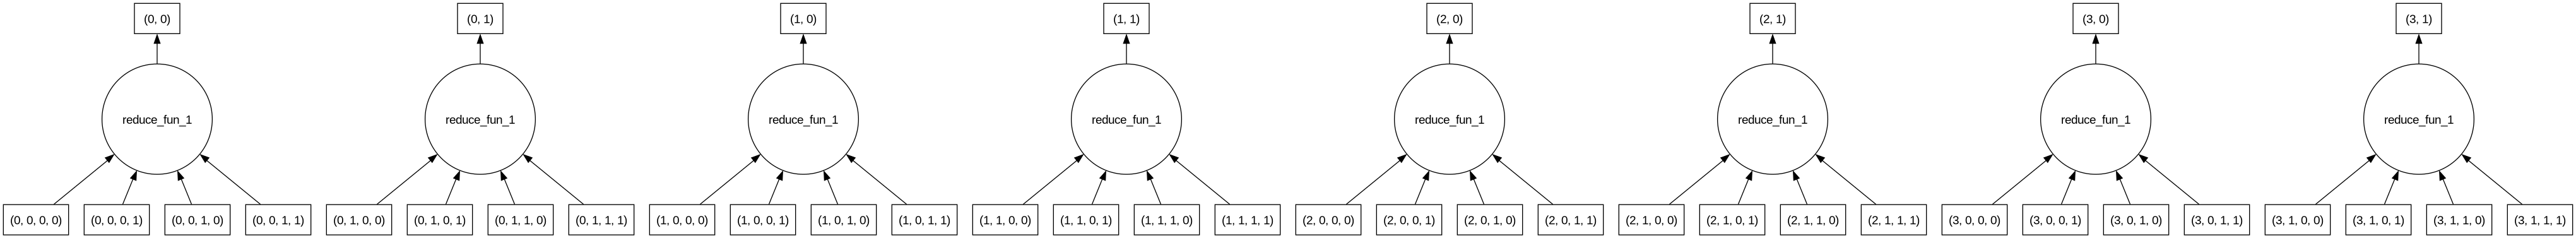

In [59]:
bw5.visualize()

In [60]:
bw5.compute()

array([[   2,   18,   34,   50,   66,   82,   98,  114],
       [ 130,  146,  162,  178,  194,  210,  226,  242],
       [ 258,  274,  290,  306,  322,  338,  354,  370],
       [ 386,  402,  418,  434,  450,  466,  482,  498],
       [ 514,  530,  546,  562,  578,  594,  610,  626],
       [ 642,  658,  674,  690,  706,  722,  738,  754],
       [ 770,  786,  802,  818,  834,  850,  866,  882],
       [ 898,  914,  930,  946,  962,  978,  994, 1010],
       [1026, 1042, 1058, 1074, 1090, 1106, 1122, 1138],
       [1154, 1170, 1186, 1202, 1218, 1234, 1250, 1266],
       [1282, 1298, 1314, 1330, 1346, 1362, 1378, 1394],
       [1410, 1426, 1442, 1458, 1474, 1490, 1506, 1522],
       [1538, 1554, 1570, 1586, 1602, 1618, 1634, 1650],
       [1666, 1682, 1698, 1714, 1730, 1746, 1762, 1778],
       [1794, 1810, 1826, 1842, 1858, 1874, 1890, 1906],
       [1922, 1938, 1954, 1970, 1986, 2002, 2018, 2034],
       [2050, 2066, 2082, 2098, 2114, 2130, 2146, 2162],
       [2178, 2194, 2210, 2226,

In [61]:
client.shutdown()